Question 1: Use yfinance to Extract Stock Data

In [3]:
import yfinance as yf

In [11]:
tesla = yf.Ticker("TSLA")

In [12]:
tesla_data = tesla.history(period="max")

In [13]:
tesla_data.reset_index(inplace=True)

In [14]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


 Question 2: Use Webscraping to Extract Tesla Revenue Data



In [47]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [72]:
url = "https://companiesmarketcap.com/tesla/revenue/"

In [73]:
html_data = requests.get(url)
web_content = html_data.content

In [74]:
soup = BeautifulSoup(web_content, 'html.parser')

In [75]:
table = soup.find('table', {'class': 'table'})
rows = table.find_all('tr')

years = []
revenues = []

for row in rows[1:]:  
    cols = row.find_all('td')
    year = cols[0].text.strip()
    revenue = cols[1].text.strip()
    years.append(year)
    revenues.append(revenue)

df_tesla = pd.DataFrame({'Year': years, 'Revenue': revenues})

print(df_tesla.tail())

    Year  Revenue
11  2013  $2.01 B
12  2012  $0.41 B
13  2011  $0.20 B
14  2010  $0.11 B
15  2009  $0.11 B


Question 3: Use yfinance to Extract Stock Data


In [61]:
gme = yf.Ticker("GME")

In [62]:
gme_data = gme.history(period="max")

In [63]:
gme_data.reset_index(inplace=True)

In [64]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data



In [113]:
url = "https://companiesmarketcap.com/gamestop/marketcap/"

In [114]:
html_data = requests.get(url)
web_content = html_data.content

In [115]:
soup = BeautifulSoup(web_content, 'html.parser')

In [116]:
table = soup.find('table', {'class': 'table'})
rows = table.find_all('tr')

years = []
revenues = []

for row in rows[1:]:  
    cols = row.find_all('td')
    year = cols[0].text.strip()
    revenue = cols[1].text.strip()
    years.append(year)
    revenues.append(revenue)

gme_df = pd.DataFrame({'Year': years, 'Revenue': revenues})

print(gme_df.tail())

    Year  Revenue
18  2006  $4.17 B
19  2005  $2.30 B
20  2004  $1.13 B
21  2003  $0.85 B
22  2002  $0.55 B


Question 5: Plot Tesla Stock Graph



In [69]:
import matplotlib.pyplot as plt

In [109]:
def make_graph(year, revenue, title):
    plt.figure(figsize=(12, 8))
    plt.plot(year, revenue, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [112]:
reverse_tesla = df_tesla.iloc[::-1]

year = reverse_tesla["Year"]
revenue = reverse_tesla["Revenue"]
title = "Tesla Stocks Over The Year"

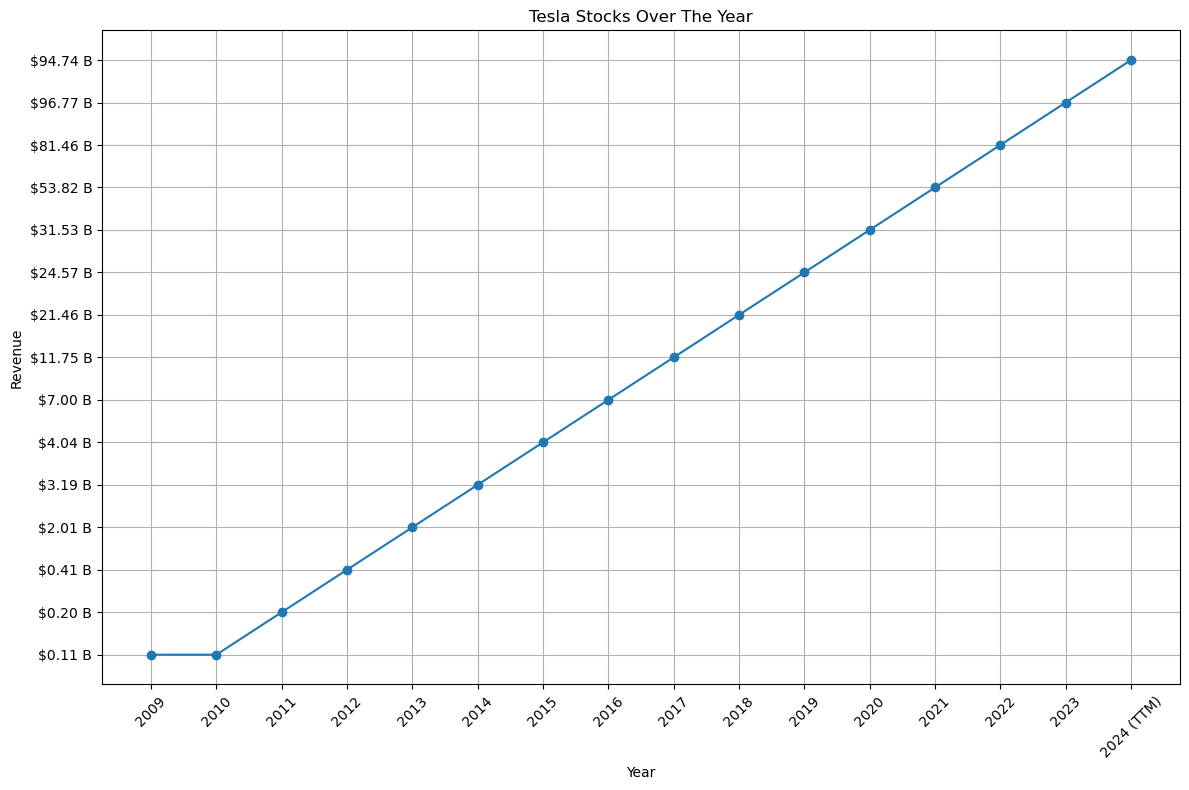

In [111]:
make_graph(year, revenue, title)

Question 6: Plot GameStop Stock Graph



In [118]:
reverse_gme = gme_df.iloc[::-1]

year = reverse_gme["Year"]
revenue = reverse_gme["Revenue"]
title = "GME Stocks Over The Year"

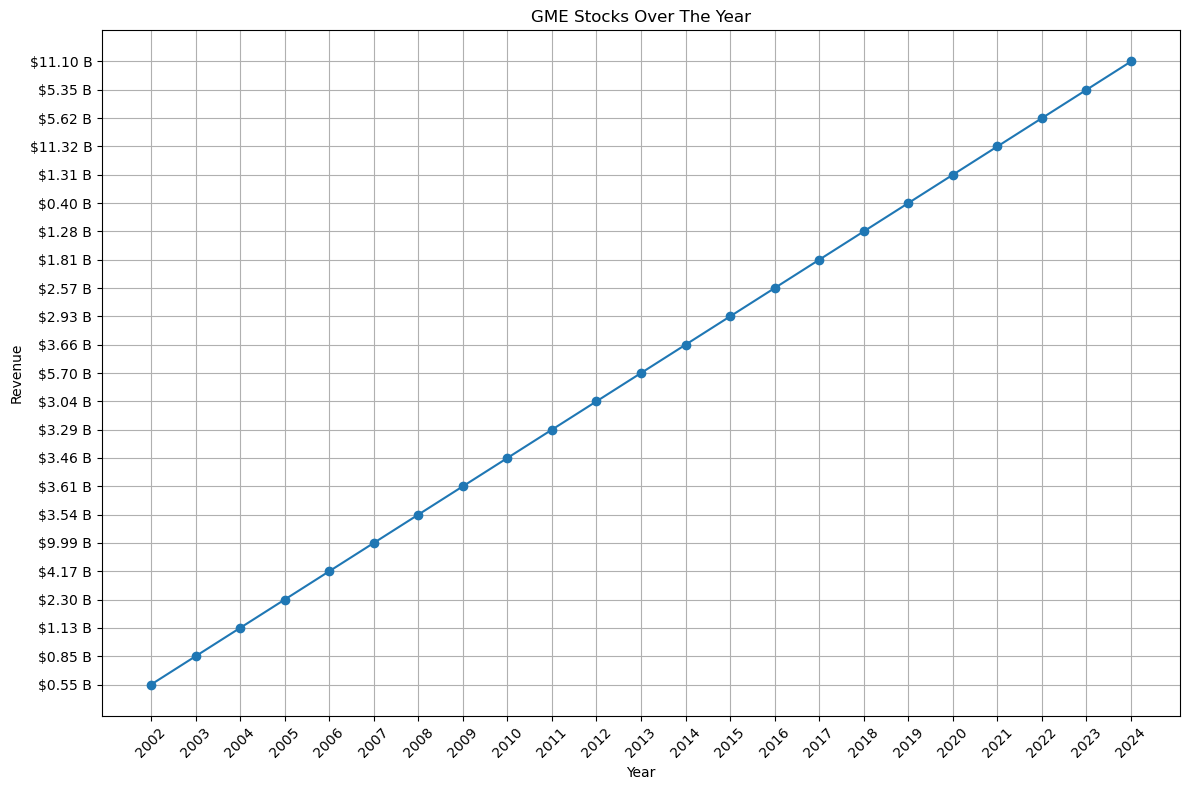

In [119]:
make_graph(year, revenue, title)